In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import chi2_contingency

# Load the dataset and explore the variables

In [4]:
df = pd.read_csv('customer_churn.txt')

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
cols = []
for i in range(len(df.columns)):
    cols.append(df.columns[i].lower())
df.columns = cols
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

# We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen and MonthlyCharges

In [8]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# Extract the target variable

In [13]:
y = df['churn']

# Extract the independent variables and scale them

In [27]:
X = df[['tenure', 'seniorcitizen', 'monthlycharges']]

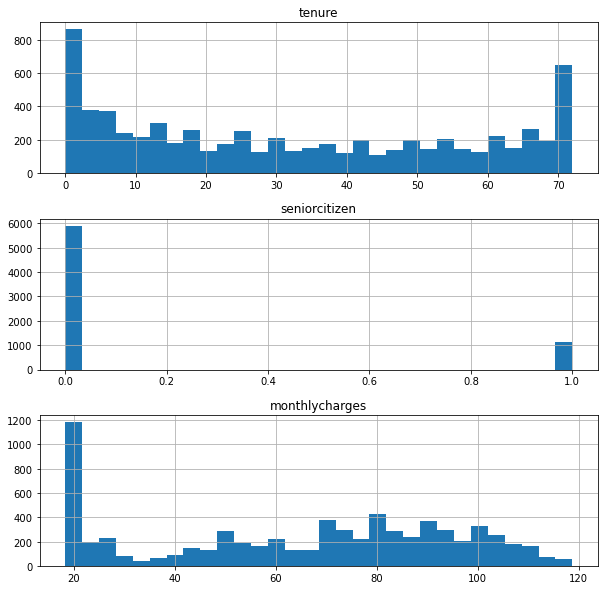

In [16]:
X.hist(bins=30, figsize=(10, 10), layout=(3, 1));

## Scaling the independent variables

In [22]:
scaler = Normalizer().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns)

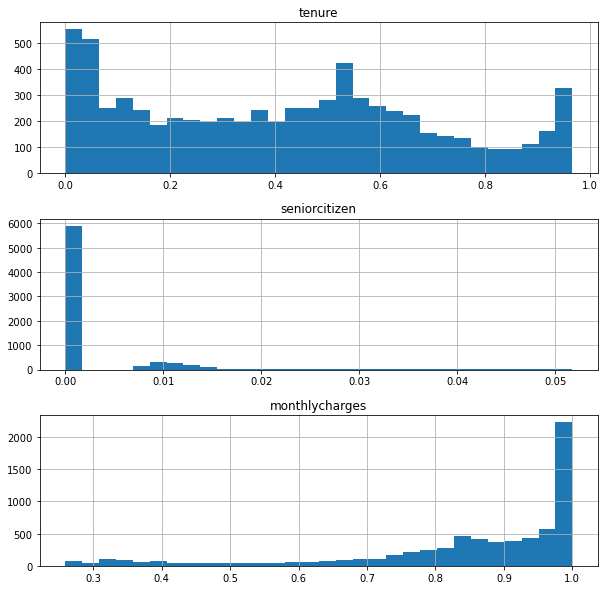

In [23]:
X_scaled.hist(bins=30, figsize=(10, 10), layout=(3, 1));

# Build the logistic regression model

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.45, random_state=40)

In [70]:
LR = LogisticRegression(max_iter=400).fit(X_train, y_train)
y_test_pred = LR.predict(X_test)

# Evaluate the model

In [29]:
accuracy_score(y_test, y_test_pred)

0.7649842271293376

In [30]:
confusion_matrix(y_test, y_test_pred)

array([[2034,  297],
       [ 448,  391]])

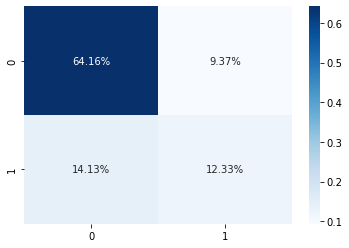

In [32]:
cmx = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cmx/np.sum(cmx), annot=True, fmt='.2%', cmap='Blues');
# mes importqnts prcentqtges per fila i columna

# Even a simple model will give us more than 70% accuracy. Why?
- Because data is imbalanced and, as we can see below, the value 'Yes' from the 'churn' variable only accounts for 36% of all registers. This means our model is not really fit for detecting the churned customers because of the composition of the train data.

In [28]:
df['churn'].value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

# Apply SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [33]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

In [34]:
X.shape

(7043, 3)

In [40]:
y.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [55]:
X_smote, y_smote = sm.fit_resample(X_scaled, y)

In [56]:
X_smote.shape

(10348, 3)

In [57]:
y_smote.value_counts()

No     5174
Yes    5174
Name: churn, dtype: int64

## New model with SMOTE

In [58]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.45, random_state=40)

In [71]:
LR_smote = LogisticRegression(max_iter=400).fit(X_train_smote, y_train_smote)
y_test_pred_smote = LR_smote.predict(X_test_smote)

In [72]:
accuracy_score(y_test_smote, y_test_pred_smote)

0.7313721279793859

In [61]:
confusion_matrix(y_test_smote, y_test_pred_smote)

array([[1582,  705],
       [ 546, 1824]])

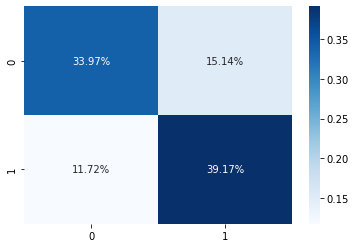

In [62]:
cmx_smote = confusion_matrix(y_test_smote, y_test_pred_smote)
sns.heatmap(cmx_smote/np.sum(cmx_smote), annot=True, fmt='.2%', cmap='Blues');

In this case, applying SMOTE has decreased the model accuracy compared to the base model. We find a bias towards false positives in this model.

# Apply TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [64]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()

In [65]:
X.shape

(7043, 3)

In [66]:
y.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [67]:
X_tl, y_tl = tl.fit_resample(X_scaled, y)

In [68]:
X_tl.shape

(6543, 3)

In [69]:
y_tl.value_counts()

No     4674
Yes    1869
Name: churn, dtype: int64

## New model with Tomek Links

In [74]:
X_train_tl, X_test_tl, y_train_tl, y_test_tl = train_test_split(X_tl, y_tl, test_size=0.45, random_state=40)

In [75]:
LR_tl = LogisticRegression(max_iter=400).fit(X_train_tl, y_train_tl)
y_test_pred_tl = LR_tl.predict(X_test_tl)

In [76]:
accuracy_score(y_test_tl, y_test_pred_tl)

0.7568760611205433

In [77]:
confusion_matrix(y_test_tl, y_test_pred_tl)

array([[1791,  313],
       [ 403,  438]])

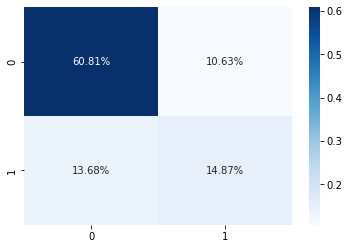

In [78]:
cmx_tl = confusion_matrix(y_test_tl, y_test_pred_tl)
sns.heatmap(cmx_tl/np.sum(cmx_tl), annot=True, fmt='.2%', cmap='Blues');

There's no improvement over the base model without resampling, but there's a slight one over the SMOTE model. We find more false negatives than positives.

# Bonus: SMOTE and then Tomek Links

In [79]:
from imblearn.combine import SMOTETomek
smotetomek = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))

In [80]:
X.shape

(7043, 3)

In [81]:
y.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [82]:
X_smtl, y_smtl = smotetomek.fit_resample(X_scaled, y)

In [83]:
X_smtl.shape

(9644, 3)

In [84]:
y_smtl.value_counts()

Yes    5174
No     4470
Name: churn, dtype: int64

In [86]:
X_train_smtl, X_test_smtl, y_train_smtl, y_test_smtl = train_test_split(X_smtl, y_smtl, test_size=0.45, random_state=40)

In [87]:
LR_smtl = LogisticRegression(max_iter=400).fit(X_train_smtl, y_train_smtl)
y_test_pred_smtl = LR_smtl.predict(X_test_smtl)

In [88]:
accuracy_score(y_test_smtl, y_test_pred_smtl)

0.7389400921658986

In [89]:
confusion_matrix(y_test_smtl, y_test_pred_smtl)

array([[1336,  665],
       [ 468, 1871]])

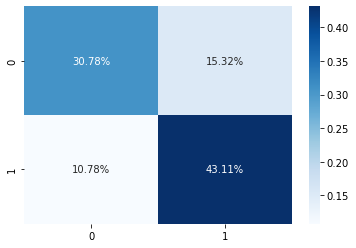

In [90]:
cmx_smtl = confusion_matrix(y_test_smtl, y_test_pred_smtl)
sns.heatmap(cmx_smtl/np.sum(cmx_smtl), annot=True, fmt='.2%', cmap='Blues');

Combining both methods doesn't yield primising results either. In this case, there's a bias towards false positives, like in the SMOTE model.